

# Clase 5. Modelos Lineales

Empezaremos a ver regresión lineal  
Este capítulo está inspirado en el capítulo 3 y 6 del libro de Introduction to Statistical Learning
 O el capítulo 3 de ESL

# Mínimos Cuadrados Ordinarios (OLS)

* Sean $y_{N \times 1}$, y $X_{N\times (p+1)}$ las variables dependiente y matriz de regresores, respectivamente, donde $X$ incluye $p$ regresores y un vector de unos.


* El modelo lineal es 

$$
\begin{eqnarray}
y &=& X\beta + \epsilon\\
\end{eqnarray}
$$


* El estimador de OLS es el vector $\hat{\beta}$ que minimiza la *suma de residuos al cuadrado* (SSR):

$$
\min_{\beta} SSR(\beta) = (y-X\beta)'(y-X\beta)
$$


* La solución se encuentra fácilmente:
$$
\hat{\beta} = (X'X)^{-1}X'y
$$

y la matriz de varianzas y covarianzas es:

$$
\Sigma_{\beta} = \hat{\sigma}^2(X'X)^{-1}
$$

donde $\hat{\sigma}^2$ es la varianza residual estimada.

# Algunas propiedades del estimador de OLS

*  **Prop 1: El estimador OLS es insesgado**:

$$
E(\hat{\beta}) = \beta
$$

(qué supuestos hay que hacer para probarlo?)

*  **Prop 2: Teorema de Gauss-Markov**:
> El estimador OLS es el estimador de menor varianza, dentro de la clase de estimadores lineales insesgados.

*  **Prop 3: Los residuos estimados son ortogonales a la matriz de regresores:**

$$
X'e = 0
$$



# Selección de variables


* En general no sabemos cuáles variables deben ir incluidas en un análisis, y este problema puede ser importante cuando tenemos muchos regresores $p$.


* Hay varios métodos de selección de variables que permiten:

    1. **Mejorar la predicción:** por ejemplo, porque un estimador tiene poco sesgo pero mucha varianza.
    
    2. **Facilitar la interpretación:** al eliminar ciertas variables podemos concentrarnos únicamente en las más importantes.
    
 
* Hay tres familias de métodos que se pueden utilizar:

    1. Selección de subconjuntos de variables
    
    2. Regularización o reducción de la magnitud de los coeficientes o *shrinkage*
    
    3. Reducción de dimensionalidad




# Selección de subconjuntos: *Best Subset Selection*

* Si tenemos $p$ regresores, queremos estimar las $\binom{p}{k}$ posibles combinaciones de subconjuntos de $k$ variables.


* Es un método exhaustivo que puede ser computacionalmente ineficientes cuando $p$ es grande.


* Veamos cómo funciona este método utilizando los datos de tarjeta de crédito que están disponibles en la página de [ISL](http://www-bcf.usc.edu/~gareth/ISL/data.html).


* Los datos incluyen el saldo en tarjeta de crédito (balance), el ingreso (Income) y límite de crédito  (Limit), score crediticio (Rating), número de tarjetas (Cards), edad, educación, género, variable indicadora del estatus de estudiante del cliente, casado, y etnicidad, para 400 clientes.


* Queremos estimar el efecto que tienen estos regresores sobre el saldo o balance de cada cliente.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('files/Credit.csv')
data.head(5)

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [38]:
# primero organicemos los datos: las variables cuantitativas están bien.  Las cualitativas toca transformarlas
N = data.shape[0]
dum_own     = np.asarray(data.Own == 'Yes').reshape((N,1))
dum_estudiante = np.asarray(data.Student == 'Yes').reshape((N,1))
dum_casado     = np.asarray(data.Married == 'Yes').reshape((N,1))
# Para etnicidad debemos excluir una variable que sirva como referencia:
# tenemos tres categorías: vamos a excluir la tercera: "African American"
print(data.Region.unique())
dum_region = np.asarray(pd.get_dummies(data.Region).iloc[:,:-1])
# etiquetas de X
labs_x = np.array(['Rating','Income','Limit','Cards','Age','Education',
              'Own','Estudiante','Casado','South','West'])
# incluyamos todas las variables:
prexmat = np.concatenate((
                        np.asarray(data.Rating).reshape((N,1)),
                        np.asarray(data.Income).reshape((N,1)),
                         np.asarray(data.Limit).reshape((N,1)),
                         np.asarray(data.Cards).reshape((N,1)),
                         np.asarray(data.Age).reshape((N,1)),
                         np.asarray(data.Education).reshape((N,1)),
                          dum_own, dum_estudiante, dum_casado, dum_region
                         ),axis=1)
saldo = np.asarray(data.Balance).reshape((N,1))
print(prexmat.shape)
# revisemos que todo quedó bien:
pd.DataFrame(prexmat).mean()

['South' 'West' 'East']
(400, 11)


0      354.940000
1       45.218885
2     4735.600000
3        2.957500
4       55.667500
5       13.450000
6        0.517500
7        0.100000
8        0.612500
9        0.247500
10       0.497500
dtype: float64

In [39]:
prexmat

array([[2.83000e+02, 1.48910e+01, 3.60600e+03, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.83000e+02, 1.06025e+02, 6.64500e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.14000e+02, 1.04593e+02, 7.07500e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.21000e+02, 5.78720e+01, 4.17100e+03, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.92000e+02, 3.77280e+01, 2.52500e+03, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.15000e+02, 1.87010e+01, 5.52400e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [40]:
# Para las posibles combinaciones vamos a usar el módulo itertools
from itertools import combinations
import sys
sys.path.append('/Users/carlos.grandet/Documents/CIDE_DS/Utils')
import olsdan as ols

# probémoslo con conjuntos de 9 elementos
list(combinations(np.arange(10),9))

# vamos a guardar los resultados en un array, pero no se cuántas filas tenemos
res_arr = np.zeros((1,6))
res_arr[:,:] = np.nan
# necesito una lista con todas las combinaciones.  La voy a guardar en un DF
initsub = np.zeros((0,9))
initsub[:] = np.nan
SubSets = pd.DataFrame(initsub)
for k in range(1,12):
    # la siguiente es la lista de todos los regresores posibles para tamaño k
    list_subsets = list(combinations(np.arange(11),k))
    SubSets = SubSets.append(list_subsets)
    # tenemos que hacer un loop sobre todas estas posibilidades:
    for s in range(len(list_subsets)):
        # los regresores seleccionados:
        ind_s = np.array(list_subsets[s])
        xmat_subset = prexmat[:,ind_s]
        # listos para estimar: pero incluyamos constante
        olssk = ols.ols_dan(saldo, np.concatenate((np.ones((N,1)),xmat_subset),axis=1))
        # guardemos los resultados: queremos: número de regresores, ssr
        # Calculemos las medidas que queremos utilizar
        Cp = (1.0/olssk.nobs)*(olssk.ssr() + 2*olssk.nvar*olssk.s2hat())
        AIC = (1.0/(olssk.nobs*olssk.s2hat()))*(olssk.ssr() + 2*olssk.nvar*olssk.s2hat())
        BIC = (1.0/olssk.nobs)*(olssk.ssr() + np.log(olssk.nobs)*olssk.nvar*olssk.s2hat())
        R2bar = olssk.R2_bar()
        prelist = np.array([k, olssk.ssr()[0][0], Cp[0,0], AIC[0,0], BIC[0,0], R2bar]).reshape((1,6))
        # listos para anexar:
        res_arr = np.concatenate((res_arr, prelist),axis=0)
res_arr = pd.DataFrame(res_arr, columns=['k', 'SSR', 'Cp', 'AIC', 'BIC', 'R2bar'])
res_arr.dropna(inplace=True)
res_arr.set_index(np.arange(res_arr.shape[0]), inplace=True)
print(res_arr.shape)

(2047, 6)


In [41]:
res_arr

,k,SSR,Cp,AIC,BIC,R2bar
0,1.0,2.143512e+07,54126.375987,1.0050,55201.219325,1.000000
1,1.0,6.620874e+07,167185.397571,1.0050,170505.370642,1.000000
2,1.0,2.171566e+07,54834.761162,1.0050,55923.671635,1.000000
3,1.0,8.370950e+07,211376.994602,1.0050,215574.525846,1.000235
4,1.0,8.433963e+07,212968.155832,1.0050,217197.284408,1.000321
...,...,...,...,...,...,...
2042,10.0,3.949432e+06,10431.984242,1.0275,11546.407229,1.000107
2043,10.0,4.117780e+06,10876.656400,1.0275,12038.582611,1.000106
2044,10.0,1.461789e+07,38611.527990,1.0275,42736.301703,1.000009
2045,10.0,3.839044e+06,10140.405169,1.0275,11223.679487,1.000057


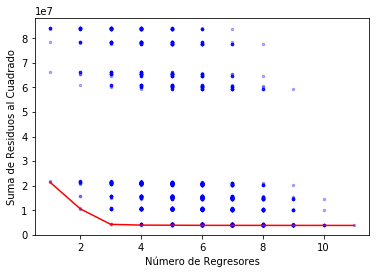

In [42]:
# Ya tenemos todos los modelos:
# Hagamos un gráfico:
plt.scatter(res_arr.k,res_arr.SSR, s=6, color='b',alpha=0.3)
plt.ylabel('Suma de Residuos al Cuadrado')
plt.xlabel(u'Número de Regresores')
# Encontremos la frontera: como en el libro:
front_ssr = res_arr.SSR.groupby(res_arr.k).min()
plt.plot(front_ssr.index, front_ssr.values, color='r')                          

In [43]:
front_ssr

k
1.0     2.143512e+07
2.0     1.053254e+07
3.0     4.227219e+06
4.0     3.915058e+06
5.0     3.866091e+06
6.0     3.821620e+06
7.0     3.810759e+06
8.0     3.800969e+06
9.0     3.794145e+06
10.0    3.789709e+06
11.0    3.786730e+06
Name: SSR, dtype: float64

# ¿Qué variables están incluidas en los mejores modelos?

* Rating

* Ingreso

* Límite de Crédito

* Número de tarjetas

* Dummy Estudiante

In [44]:
res_arr.SSR.values

array([21435122.03273295, 66208744.51078422, 21715656.6591137 , ...,
       14617892.34856283,  3839043.90323933,  3786730.19067778])

In [45]:
np.isin(res_arr.SSR.values,front_ssr.values)

array([ True, False, False, ..., False, False,  True])

In [46]:
# Teníamos unos índices equivocados.  Vamos a hacerlo de 0 a M (M es el número total de modelos o combinaciones)
SubSets.set_index(np.arange(SubSets.shape[0]), inplace=True)
# Get the regressors that were selected:
ind_best = np.isin(res_arr.SSR.values,front_ssr.values)
# teniendo los índices podemos encontrar: los 10 mejores
ind_best = res_arr.index[ind_best]
ind_subset = np.in1d(SubSets.index,ind_best)
SubSets.loc[ind_best]
for i in range(SubSets.loc[ind_best].shape[0]):
    preind = SubSets.loc[ind_best].iloc[i,:]
    #print preind
    preind = np.asarray(pd.Series(preind).dropna(), dtype='int')
    print(labs_x[preind])

['Rating']
['Rating' 'Income']
['Rating' 'Income' 'Estudiante']
['Income' 'Limit' 'Cards' 'Estudiante']
['Rating' 'Income' 'Limit' 'Cards' 'Estudiante']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Estudiante']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Own' 'Estudiante']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Own' 'Estudiante' 'South']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Own' 'Estudiante' 'Casado'
 'South']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Education' 'Own' 'Estudiante'
 'Casado' 'South']
['Rating' 'Income' 'Limit' 'Cards' 'Age' 'Education' 'Own' 'Estudiante'
 'Casado' 'South' 'West']


# Cómo seleccionamos el mejor modelo?

* Una vez tenemos la frontera, podemos utilizar cuatro opciones para seleccionar:

    1. **Cross-Validation**: minimizar el SSR promedio.
    
    2. Minimizar el Criterio de Información de Akaike:
    $$
    AIC = \frac{1}{n}(RSS + 2d \hat{\sigma}_2)
    $$
    3. Minimizar el Criterio de Información de Bayesiano:
    $$
    BIC = \frac{1}{n}(RSS + \ln(n)d \hat{\sigma}_2)
    $$
    4. Maximizar el $\overline{R}^2$


* La ventaja de los últimos tres criterios es que no necesitamos utilizar muestras de validación: los criterios penalizan el uso indebido de regresores adicionales.

    * Esto es importante: para obtener los últimos tres criterios **no** necesitamos hacer validación cruzada: lo podemos hacer directamente en la muestra de entrenamiento.

# 1. Seleccionando el mejor modelo: Cross-Validation

* El proceso de validación cruzada es simple:

    1. Tenemos identificados los mejores 9 modelos, i.e. los modelos sobre la frontera roja en el gráfico de arriba.
        
        * Cada modelo $\mathcal{M}_k$, identifica la mejor combinación de $k$ regresores en términos de SSR.        
        
    2. Vamos a hacer 10-fold CV: 
        * Dividimos la muestra en 10 grupos iguales.
        * Vamos a iterar el proceso haciendo un loop sobre $1,2,\cdots,10$, donde en cada iteración $g$, la muestra de entrenamiento excluye al grupo $g$, que es utilizado como grupo de validación.
        * Para cada modelo $\mathcal{M}_k$, estimamos los coeficientes de OLS utilizando los 9 grupos de entrenamiento correspondientes.
        * Con estos coeficientes, obtenemos el `SSR` de la muestra de validación correspondiente y lo guardamos.
        * Así, terminamos con una matriz de tamaño $10 \times 10$, donde las filas denotan el modelo, el grupo excluído en la muestra de entrenamiento.
        
* **En la tarea voy a dejar que lo programen ustedes mismos**   

![caption](figures/credit_10fcv.png)


### Selección de modelo probabilístico
La selección de modelos probabilísticos (o "criterios de información") proporciona una técnica analítica para puntuar y elegir entre modelos candidatos.

Los modelos se califican tanto por su rendimiento en el conjunto de datos de entrenamiento como por la complejidad del modelo.

- Rendimiento del modelo . Qué tan bien se ha desempeñado un modelo candidato en el conjunto de datos de entrenamiento.
- Complejidad del modelo . Lo complicado que es el modelo de candidato entrenado después del entrenamiento.

El rendimiento del modelo puede evaluarse utilizando un marco probabilístico, como log-verosimilitud en el marco de la estimación de máxima verosimilitud. La complejidad del modelo puede evaluarse como el número de grados de libertad o parámetros en el modelo.


Un beneficio de los métodos de selección de modelos probabilísticos es que no se requiere un conjunto de datos de prueba, lo que significa que todos los datos se pueden usar para ajustar el modelo, y el modelo final que se usará para la predicción en el dominio se puede calificar directamente.


Existen dos enfoques estadísticos para estimar qué tan bien se ajusta un modelo determinado a un conjunto de datos y qué tan complejo es el modelo:
- Criterio de información de Akaike (AIC). Derivado de la probabilidad frecuentista.
- Criterio de Información Bayesiano (BIC). Derivado de la probabilidad bayesiana.

Cada estadística se puede calcular utilizando la verosimilitud logarítmica para un modelo y los datos. Log-verosimilitud proviene de la Estimación de Máxima Verosimilitud.

En Estimación de Máxima Verosimilitud , deseamos maximizar la probabilidad condicional de observar los datos ( X ) dada una distribución de probabilidad específica y sus parámetros ( theta ), expresados ​​formalmente como:

P(X; theta)

La distribución de probabilidad conjunta se puede reformular como la multiplicación de la probabilidad condicional dados los parámetros de distribución. Multiplicar muchas probabilidades pequeñas juntas puede ser inestable; como tal, es común reformular este problema como la suma de la probabilidad condicional del logaritmo natural.

Suma(log(P(xi ; theta)))

Criterio de información de Akaike
El criterio de información de Akaike , o AIC para abreviar, es un método para puntuar y seleccionar un modelo.

Lleva el nombre del desarrollador del método, Hirotugu Akaike.

La estadística AIC se define para la regresión logística de la siguiente manera (tomado de " Los elementos del aprendizaje estadístico "):


AIC = -2/N * LL + 2 * k/N

Donde N es el número de ejemplos en el conjunto de datos de entrenamiento, LL es la verosimilitud logarítmica del modelo en el conjunto de datos de entrenamiento y k es el número de parámetros en el modelo.

# Miremos los resultados con otros dos criterios: $BIC$ y $\bar{R}^2$
![caption](figures/bicr2bar.png)

# Forward Stepwise Selection


* *Best Subset Selection* es intensivo en poder computacional: necesitamos estimar modelos para **todas** las combinaciones de regresores.

* En el ejemplo anterior, con sólo 10 regresores tuvimos que hacer 2047 estimaciones.

* Una alternativa más eficiente consiste en utilizar un método *bottom-up*:

    * Empezamos con el modelo con una constante.
    
    * Vamos incluyendo regresores de manera iterativa.
    
        * El criterio es seleccionar el regresor que minimiza el SSR en esa iteración.
    
    * Para seleccionar el mejor modelo *global* (tenemos tantos modelos como regresores) utilizamos CV o cualquiera de los otros criterios de selección vistos anteriormente.
    

In [47]:
prexmat

array([[2.83000e+02, 1.48910e+01, 3.60600e+03, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.83000e+02, 1.06025e+02, 6.64500e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.14000e+02, 1.04593e+02, 7.07500e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [3.21000e+02, 5.78720e+01, 4.17100e+03, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.92000e+02, 3.77280e+01, 2.52500e+03, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.15000e+02, 1.87010e+01, 5.52400e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [48]:
import sys
sys.path.append('/Users/carlos.grandet/Documents/CIDE_DS/Utils')
import olsdan as ols
# forward step-wise selection
# inicialicemos la iteración con una constante
xmat_fss = np.ones((N,1))
# primera iteración: tenemos que seleccionar P modelos
nvar = prexmat.shape[1]
SSRfss = np.zeros((nvar,2))
# una lista donde vamos a guardar los regresores:
reg_opt = []
for k in range(nvar):
    # para cada modelo tenemos que iterar sobre los regresores que quedan:
    # seleccionemos los que quedan:
    ind_quedan = np.setdiff1d(np.arange(nvar),np.array(reg_opt))
    # estamos listos para seleccionar el mejor modelo
    nvar_quedan = ind_quedan.shape[0]
    SSRmat = np.zeros((nvar_quedan,2))
    counter = 0
    for p in ind_quedan:
        # tenemos que utilizar los X previamente seleccionados
        newx = np.concatenate((xmat_fss, prexmat[:,p].reshape((N,1))),axis=1)
        # podemos estimar:
        olsp = ols.ols_dan(saldo,newx)
        SSRmat[counter,:] = [p,olsp.ssr()[0,0]]
        counter +=1
    # terminamos el loop
    # tenemos que seleccionar el regresor actual que minimiza SSRMat
    row_min = np.argmin(SSRmat[:,1],axis=0)
    ssr_min = SSRmat[row_min,1]
    var_min = SSRmat[row_min,0]
    # guardemos esta información
    SSRfss[k,:] = [var_min,ssr_min]
    # finalmente, actualicemos la matriz
    xmat_fss = np.concatenate((xmat_fss,prexmat[:,int(var_min)].reshape((N,1))),axis=1)
    reg_opt.append(int(var_min))

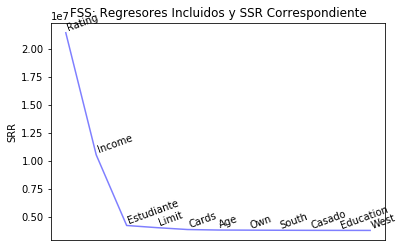

In [49]:
plt.plot(np.arange(1,12), SSRfss[:,1], color='b',alpha=0.5)
for p in range(11):
    plt.text(p+1,SSRfss[p,1],labs_x[int(SSRfss[p,0])], rotation=20,
                verticalalignment='bottom', horizontalalignment='left')
# los ticks en x no dicen nada ahora que incluimos las ettiquetas
plt.xticks([])
plt.title('FSS: Regresores Incluidos y SSR Correspondiente')
plt.ylabel('SRR')
plt.show()


# Backward Stepwise Selection

* Este método es parecido, pero opera de arriba hacia abajo o *top-down*


* Empezamos con un modelo que incluye **todos** los regresores.


* Vamos excluyendo regresores así:

    * En cada iteración nos quedan $k$ regresores.
    
    * Seleccionamos el modelo con $k-1$ regresores (excluyendo una variable) que tiene el menor SSR.
    

* De los $P$ modelos posibles, seleccionamos el mejor modelo global con CV o cualquiera de los otros métodos.

![caption](figures/bss_credit.png)

# Componentes Principales (PCA):

* Una alternativa bastante utilizada en econometría es seleccionar sólo un subconjunto de *combinaciones lineales* de los regresores, y en particular, aquella que tenga un poder de síntesis sobre la matrix $X$ completa lo suficientemente grande.


* En series de tiempo, por ejemplo, cuando tenemos numerosas variables endógenas en un vector autoregresivo o VAR, es fácil agotar los grados de libertad rápidamente si intentamos incluir una dinámica flexible, es decir, un orden de autoregresión que incluya $2,3,4,5, etc.$ rezagos de *todas* las variables endógenas.


* Ver por ejemplo la literatura sobre **Factor Augmented Vector Autoregressive Regression (FAVAR)**.
  
  
* La pregunta que queremos responder es simple:

    > ¿Dada la matriz $X_{N \times {p+1}}$, podemos reducir la dimensionalidad de $X$ sin perder poder explicativo?


* A diferencia de los métodos anteriores donde la *reducción de dimensionalidad* se obtiene *excluyendo* regresores, en PCA se obtiene mediante una selección inteligente de combinaciones lineales de los regresores.


* Así, la primera combinación lineal que utilicemos será la que explique un mayor porcentaje de la varianza de $X$, la siguiente la que explique el segundo mayor porcentaje de la varianza de $X$, y así sucesivamente.

# Componentes Principales (cont):

* Antes de empezar, es común, **centrar** la matriz de regresores, así que, abusando un poco de la notación, sea $X$ una matriz de tamaño $N \times p$, donde cada regresor $x_k$ ha sido centrado, es decir, $x_k- \overline{x}_k$.

    * También es importante centrar la variable dependiente, $y$.  Por esto excluimos la constante.
    
    
* La intuición de los componentes principales se puede obtener muy rápidamente así.


* Supongamos que tenemos $p$  variables aleatorias.

    * Nota 1: la matriz $X$ centrada, recoge las $N$ realizaciones de estas variables aleatorias.
    
    * Nota 2: $N^{-1}X'X$ es la matriz de covarianzas muestral, contraparte de $\Sigma$.
    

* Nuestro objetivo es encontrar un vector $\alpha_j = [\alpha_{1j}, \alpha_{2j}, \cdots, \alpha_{pj}]$ tal que 
$$
\sum_{k=1}^p \alpha_{kj} x_{kj} = \mathbf{\alpha}_j' x
$$

tenga la *mayor varianza posible*.

* Como 

$$
Var(\mathbf{\alpha}_j' x) = \mathbf{\alpha}_j' \mathbf{\Sigma} \mathbf{\alpha}_j
$$

sabemos que podemos elegir $\mathbf{\alpha}_j$ cada vez más grande, así que el problema está indeterminado, a menos que impongamos una normalización: $\mathbf{\alpha}_j'\mathbf{\alpha}_j = 1$.

# Componentes Principales (cont.)


* El problema de optimización que queremos resolver es:

$$
max_{\mathbf{\alpha}_j} \hspace{2mm} \mathcal{L} = \mathbf{\alpha}_j' \mathbf{\Sigma} \mathbf{\alpha}_j - \lambda(\mathbf{\alpha}_j'\mathbf{\alpha}_j - 1)
$$

* Diferenciando, tenemos las condiciones de primer orden:

$$
\begin{eqnarray*}
\mathbf{\Sigma} \mathbf{\alpha}_j &=& \lambda \mathbf{\alpha}_j \\
\mathbf{\alpha}_j'\mathbf{\alpha}_j &=& 1
\end{eqnarray*}
$$

así que podemos reconocer que $\mathbf{\alpha}_j$ es un **vector propio de $\Sigma$**, y $\lambda$ el valor propio correspondiente.


* Pero cuál vector propio?


* Queremos maximizar 
$$
\mathbf{\alpha}_j' \mathbf{\Sigma} \mathbf{\alpha}_j = \mathbf{\alpha}_j' \lambda \mathbf{\alpha}_j = \lambda \mathbf{\alpha}_j' \mathbf{\alpha}_j
$$ 
(¿por qué?)

así que la selección es simple: queremos el vector propio $\mathbf{\alpha}_j$ que corresponda al **mayor** valor propio $\lambda$.


* Este es el **primer componente principal**: $x'\mathbf{\alpha}_j$


* Se puede demostrar que el segundo componente principal es la proyección de $X$ utilizando el vector propio correspondiente al segundo mayor valor propio, y así sucesivamente.


* Así, los componentes principales se obtienen como el producto de $XV$, donde $V$ es la matriz que tiene los vectores propios correspondientes.

# Resumen del procedimiento:

* Paso 1. Centrar la matriz $X$.

* Paso 2. Obtener los primeros $k$ vectores propios de $X'X$, $k \in  \{1,2,\cdots, p\}$, con la convención que  $\lambda_1> \lambda_2 > \cdots > \lambda_p$:

$$
Z_k = XV_k
$$

* Paso 3. Hacer una regresión de

$$
y = Z_k \theta + \epsilon
$$

* Paso 4. Guardar el SSR_k y seleccionar el número óptimo por medio de validación cruzada.

[-1.44773082e-15  4.61852778e-16]


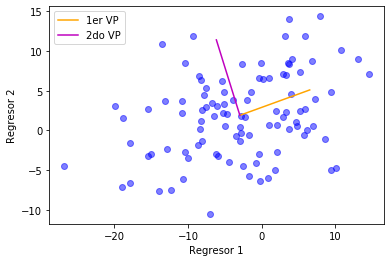

In [50]:
#------------------------------
# Ejemplo con dos regresores:
#------------------------------
# vamos a simular dos regresores correlacionados
np.random.seed(421091725)
N = 100
mu = np.array([-3,2])
W  = np.random.randn(2,2)
DD = np.diag(np.array([10,5]))
Sigma = np.dot(W.T,np.dot(DD,W))
xmat = np.random.multivariate_normal(mu,Sigma,N)

# Paso 1: centrar (usemos broadcasting para facilitar)
xmat_dem = xmat - xmat.mean(axis=0).reshape((1,2))
# probemos que quedó bien hecho
print(xmat_dem.mean(axis=0))

# Paso 2: obtengamos los vectores y valores propios
Smat = (1.0/N)*np.dot(xmat_dem.T,xmat_dem)
D, V = np.linalg.eig(Smat)

# Grafiquémoslos
plt.scatter(xmat[:,0],xmat[:,1], color='b', alpha=0.5)
plt.xlabel('Regresor 1')
plt.ylabel('Regresor 2')
x1bar = xmat.mean(axis=0)[0]
x2bar = xmat.mean(axis=0)[1]
newV = 10*V
plt.plot([x1bar,x1bar + newV[0,0]], [x2bar,x2bar + newV[1,0]], color='orange', label='1er VP')
plt.plot([x1bar,x1bar + newV[0,1]], [x2bar,x2bar + newV[1,1]], color='m', label='2do VP')
plt.legend(loc='best')

# Componentes Principales :


* Los componentes principales son ortogonales entre sí:

    * Los vectores propios lo son.
    
* El primer componente principal busca la dirección de máxima varianza.

* Para obtener la proporción de la varianza de $X$ explicada por el componente principal $k$:

$$
\frac{\lambda_k}{\sum_j \lambda_j}
$$

2.501110429875553e-13


Text(0, 0.5, '% Varianza Explicada')

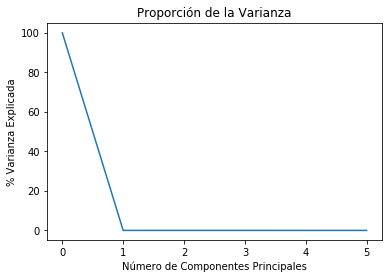

In [51]:
# Volvamos al ejemplo de datos de Crédito
N = data.shape[0]
# Hay dos tipos de variables: continuas y categóricas
prexmat_con = np.concatenate((
                        np.asarray(data.Rating).reshape((N,1)),
                        np.asarray(data.Income).reshape((N,1)),
                         np.asarray(data.Limit).reshape((N,1)),
                         np.asarray(data.Cards).reshape((N,1)),
                         np.asarray(data.Age).reshape((N,1)),
                         np.asarray(data.Education).reshape((N,1)),
                         ),axis=1)
prexmat_cat = np.concatenate((
                           dum_own, dum_estudiante, dum_casado, dum_region
                         ),axis=1)
saldo = np.asarray(data.Balance).reshape((N,1))
nvar_con = prexmat_con.shape[1]

# Paso 1: Centrar la matriz de variables continuas
prexmatcon_dem = prexmat_con - np.nanmean(prexmat_con, axis=0).reshape((1,nvar_con))
# check
print(prexmatcon_dem.mean(axis=0).max())

# Paso 2: Eigenvalue decomposition
D,V = np.linalg.eig(np.dot(prexmatcon_dem.T, prexmatcon_dem))

# Paso 3: Construcción de los componentes principales:
# Organicémoslos de menor a mayor: NO SIEMPRE LO ESTAN
D = pd.DataFrame(D, columns=['valores_ppios']).sort_values(by='valores_ppios', ascending=False)
ind_sorted = D.index
# Componentes principales: con los valores propios ordenados de mayor a menor
Zmat = np.dot(prexmatcon_dem,V[:,ind_sorted])
# Veamos la proporción de las varianzas explicadas por todos
plt.plot((100*D/D.sum()).values)
plt.title(u'Proporción de la Varianza')
plt.xlabel(u'Número de Componentes Principales')
plt.ylabel('% Varianza Explicada')

1     37
2     39
3     35
4     42
5     39
6     45
7     40
8     38
9     56
10    29
dtype: int64


Text(0, 0.5, 'SSR Promedio en Grupos de VC')

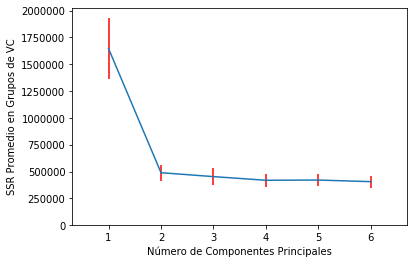

In [52]:
# Vamos a hacer CV con 10 grupos:
grp_cv = 10
ind_grp = np.dot(np.random.multinomial(1,[1.0/grp_cv]*grp_cv, N),np.arange(1,grp_cv+1).reshape(grp_cv,1))
# check:
check = pd.Series(ind_grp.flatten()).groupby(pd.Series(ind_grp.flatten())).count()
print(check)
# Inicialicemos matriz donde vamos a guardar los resultados:
SSRCP = np.zeros((grp_cv,nvar_con))
# centremos y, así no tenemos que incluir constante
saldo_cen = saldo - np.nanmean(saldo,axis=0)
# loop externo: grupos
for g in np.arange(grp_cv):
    ind_train = (ind_grp!=g+1)
    n_train   = ind_train.sum()
    ind_valid = (ind_grp==g+1)
    n_valid   = ind_valid.sum()
    # asignemos variables:
    yy_train  = saldo_cen[ind_train].reshape((n_train,1))
    yy_valid  = saldo_cen[ind_valid].reshape((n_valid,1))
    zz_train  = Zmat[ind_train.flatten(),:]
    zz_valid  = Zmat[ind_valid.flatten(),:]
    dd_train  = prexmat_cat[ind_train.flatten(),:]
    dd_valid  = prexmat_cat[ind_valid.flatten(),:]
    # loop interno: modelos (número de CP)
    for k in range(nvar_con):
        # Necesitamos incluir variables categóricas y los componentes principales
        fullxmat_train = np.concatenate((zz_train[:,:k+1],dd_train),axis=1)
        fullxmat_valid = np.concatenate((zz_valid[:,:k+1],dd_valid),axis=1)
        full_nvar = fullxmat_valid.shape[1]
        olsk = ols.ols_dan(yy_train,fullxmat_train)
        # necesitamos el SSR evaluado en valid
        yhat_valid = np.dot(fullxmat_valid,olsk.betahat().reshape((full_nvar,1)))
        res_valid  = yy_valid - yhat_valid
        SSRCP[g,k] = np.dot(res_valid.T,res_valid)
        

mean_ssr = pd.DataFrame(SSRCP).mean()
sem_ssr  = pd.DataFrame(SSRCP).sem()
plt.plot(np.arange(1,nvar_con+1), mean_ssr.values)
plt.bar(np.arange(1,nvar_con+1), mean_ssr.values, ec='w', fc='w', align='center',
                    yerr = 1.96*sem_ssr.values, ecolor='r')
plt.xlabel(u'Número de Componentes Principales')
plt.ylabel(u'SSR Promedio en Grupos de VC')

# Regularización

En este notebook vamos a estudiar como la regularización puede ayudarnos a reducir los efectos del bias y la varianza. En concreto veremos como utilizar regularización en modelos de regresión.



Todos los modelos de regresión lineal aprenden una serie de *coeficientes* (también llamados parámetros o pesos) y un *intercept* para realizar una combinación lineal de las características del modelo a aprender. Así tenemos que:

```
y_pred = x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_
```

Existen varios modelos de regresión lineal cuya principal diferencia reside en las restricciones que le ponemos en los *coeficientes*. Recordad que estas restricciones se conocen como regularización.

Vamos a generar una conjunto de datos sintético que nos permita ver el comportamiento de estos modelos.

In [53]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30,
                                         n_informative=10, noise=100,
                                         coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)

print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)



## Linear Regression

El modelo lineal más famoso es la regresión OLS (Ordinary Least Squares), llamada *regresión lineal*. Este tipo de regresión no impone ninguna restricción a los coeficientes. Esto significa que cuando tenemos un gran número de caracterísiticas, el modelo tienda a sobreajustar.

$$ \text{min}_{w, b} \sum_i || w^\mathsf{T}x_i + b  - y_i||^2 $$

In [54]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)

In [55]:
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))
print("R^2 on test set: %f" % linear_regression.score(X_test, y_test))

R^2 on training set: 0.878011
R^2 on test set: 0.216332




Como vemos el $R^2$ en el conjunto de entrenamiento es muy alto, pero muy bajo en el conjunto de test. Esto suele ser un indicativo de que nuestro modelo está sobreajustando.

Vamos a aprovecharnos que nuestros datos son sinténticos para evaluar como se comporta el modelo real sobre los datos:

In [56]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.5985284495875146


Por lo que podemos decir que un 𝑅2≈0.6 es un resultado ideal para nuestro conjunto de datos.

También vamos a aprovechar que tenemos conjuntos de datos sinténticos para comparar los coeficientes del aprendidos por el modelo con los coeficientes reales de nuestros datos sinténticos:

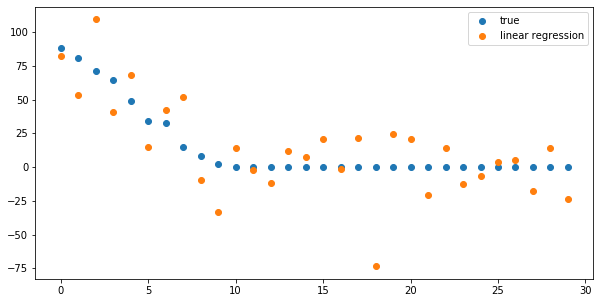

In [57]:
plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="linear regression")

plt.legend()

Un método muy útil para conocer si nuestro modelo sufre de underfitting o de overfitting es calcular las curvas de aprendizaje. Éstas muestran el score del modelo en los conjuntos de training y de test para un número determinado de muestras de entrenamiento.

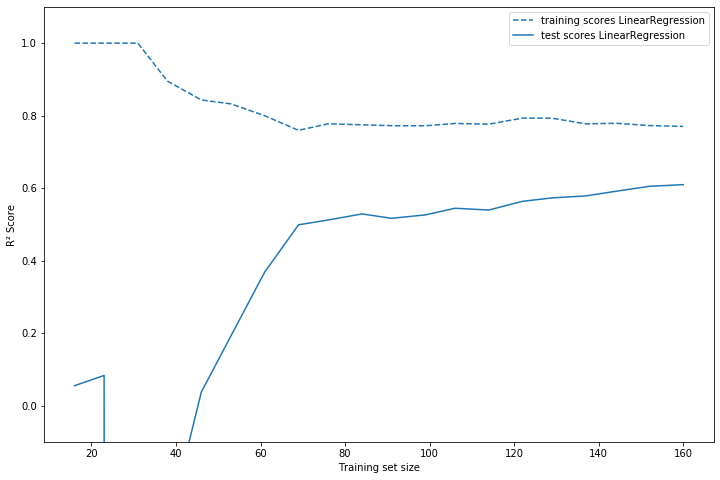

In [58]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('R² Score')
    plt.legend(loc='best')
    plt.ylim(-0.1, 1.1)

plt.figure(figsize=(12,8))    
plot_learning_curve(LinearRegression(), X, y)

# Ridge Regression

* Excluyendo la regresión por componentes principales, los métodos anteriores son discontinuos o *sparse*, en el sentido que de los $P$ regresores, sólo excluimos una parte de ellos.
    
    * Los coeficientes $\hat{\beta}_k$ son cero o distintos de cero.
    
* Tiene la ventaja que facilita la interpretación.

* Pero las predicciones pueden tener mucha varianza: incluimos o excluimos regresores.

* Una alternativa es buscar un procedimiento más *suave*, en donde minimicemos el valor absoluto de los coeficientes, sin llevarlos a cero.

* Esto se puede plantear fácilmente en un modelo de optimización donde penalizamos los coeficientes grandes.

$$
\beta_{ridge} = argmin_{\beta} (y - X\beta)'(y - X\beta) + \lambda \beta'\beta
$$

* Derivando, se puede ver que la solución a este problema es:

$$
\beta_{ridge} = (X'X + \lambda I)^{-1}X'y
$$

* **Nota**: **estas fórmulas asumen que el modelo se ha estandarizado, es decir, todas las variables, $y$ ha sido centrada y $x$ estandarizadas, así que excluimos la constante de la estimación.** 

# Ridge Regression: ¿cómo se estima?


* La ecuación de arriba muestra que estimar el método de Ridge Regression es inmediato.


* Para cada valor de $\lambda$, podemos estimar $\beta_{ridge}$.


* Así, si $\lambda = 0$ obtenemos el estimador de OLS.


* A medida que aumentamos $\lambda$ penalizamos más los coeficientes, y los empezamos a reducir.


* **Pregunta:** ¿Por qué quisiéramos hacer eso?


* **Respuesta:** Trade-off entre varianza y sesgo.

> *Reducir ciertos coeficientes suaviza las predicciones en muestras distintas, así que el error de predicción puede tener menor varianza*

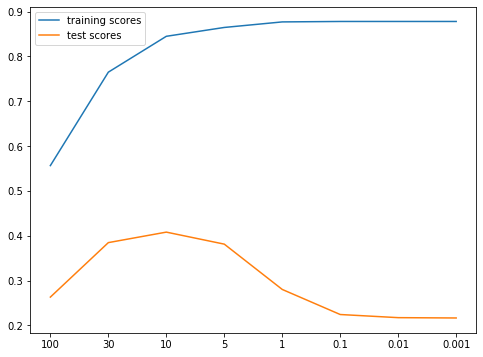

In [59]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []
alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001]
for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure(figsize=(8,6))
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(len(alphas)), alphas)
plt.legend(loc="best")

Tenemos el máximo score en el conjunto de test para 𝛼=10.

EJERCICIO:

- Qué le ocurre al modelo para valores de 𝛼 menores a 10?
- Qué le ocurre al modelo par avalores de 𝛼 mayores a 10?
- Vamos a ver lo ocurre con los coeficientes:

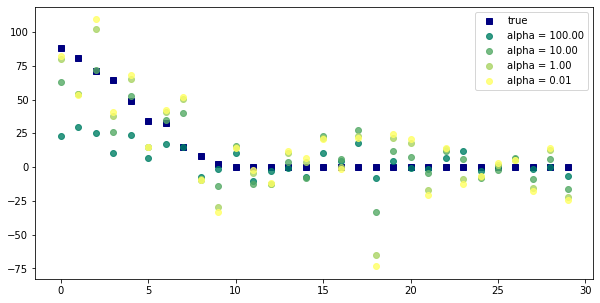

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "s", label="true", c='navy')

for i, alpha in enumerate([100, 10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, alpha=0.8, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

A 𝛼 se le conoce como hiperparametro!!

Valores altos de 𝛼 producen que el modelo tienda a ajustar los pesos a 0.
Es decir, aumentan el bias del modelo.
Valores bajos de 𝛼 producen que el modelo se comporte como una regresión lineal sin regularización.
En resumen: es muy importante elegir el valor óptimo de 𝛼.

Ahora vamos a ver las curvas de aprendizaje del modelo de Ridge vs la Regresión Lineal.



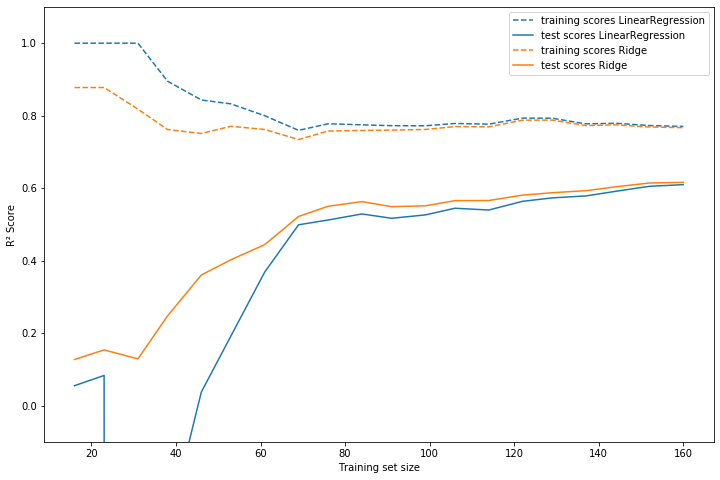

In [61]:
plt.figure(figsize=(12, 8))
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)

# Ridge Regression y Cross-Validation


* Para cada valor $\lambda$ tenemos unos coeficientes $\beta_{ridge}(\lambda)$.


* ¿Cuál valor escogemos?


* La respuesta es simple: dejemos que los datos nos lo digan utilizando CV


# Descomposición en Valores Singulares


* Una pregunta es por qué puede funcionar un método como este.


* Para entender necesitamos introducir una descomposición matricial que es muy utilizada en estadística.


* Toda matriz $X_{N\times p}$ puede descomponerse en el producto de tres matrices:

$$
X = U_{N \times p} D_{p \times p} V_{p \times p}'
$$

donde las columnas de $\mathbf{U}$ son una base ortonormal del espacio de *columnas* de $\mathbf{X}$, y las columnas de $\mathbf{V}$ una base ortonormal del espacio de *filas* de $\mathbf{X}$:

$$
U'U = I_{p} \\
V'V = I_{p}
$$

y $\mathbf{D}$ es una matriz diagonal con $d_{ii}$ los valores singulares de $\mathbf{X}$.


* Así, el $y$ estimado de OLS se puee escribir como

$$
\begin{eqnarray*}
X\hat{\beta} &=& X(X'X)^{-1}X'y \\
&=& (UDV)(VDU'UDV')^{-1} (VDU') y \\
&=& UU'y
\end{eqnarray*}
$$

(¿por qué?)

# Valores Singulares: ¿qué pasa en el caso de Ridge Regression?


* Repitamos para el estimador de *Ridge*

$$
\begin{eqnarray*}
X \beta_{ridge} &=& X(X'X + \lambda I_p)^{-1}X'y \\
&=& (UDV)(VD^2V' + \lambda I_p)^{-1} (VDU') y \\
&=& (UDV)(V(D^2 + \lambda I_p) V')^{-1} (VDU') y \\
&=& UD(D^2 + \lambda I_p)^{-1}DU'y \\
&=& \sum_i \mathbf{u_i} \left(\frac{d_i^2}{d_i^2 + \lambda}\right) \mathbf{u_i}'  y
\end{eqnarray*}
$$


* ¿Qué pasa cuando $\lambda=0$?


* Sabemos que estamos en el caso de OLS (compárenlo con el resultado de la diapósitiva anterior).


* Cuando $\lambda \neq 0$, el estimador reduce las coordenadas de $y$ en el espacio de la base ortonormal $\mathcal{U}$, y lo hace por un factor 

$$
\frac{d_i^2}{d_i^2 + \lambda}
$$


* La reducción es *mayor* a medida que $d_i^2$ es más chico (lámina siguiente)

Text(0, 0.5, 'Shrinkage')

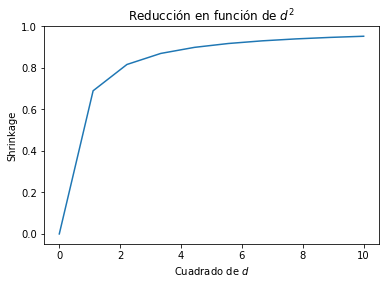

In [62]:
dvec = np.linspace(0,10,10)
lambda_vec = 0.5
shrink_fac = dvec/(dvec + lambda_vec)
plt.plot(dvec, shrink_fac)
plt.title(u'Reducción en función de $d^2$')
plt.xlabel('Cuadrado de $d$')
plt.ylabel('Shrinkage')

# ¿Cuándo es $d_i^2$ más grande o más chico?


* Recordemos que la para la matriz de covarianzas de $X$: $N^{-1}X'X$:

$$
X'X = VD^2V'
$$

* Y ahora notemos que $\mathbf{V}$ son los vectores propios de $X'X$:

$$
X'X V = VD^2V'V = VD^2
$$

Así que para el primer vector propio $\mathcal{v}_1$, el valor propio es $d_1^2$

$$
X'X v_1 = v_1 d_1^2
$$

> *La reducción es mayor con los vectores propios asociados a valores propios de $X'X$ más pequeños, es decir, aquellos que explican una menor varianza de $X$ o sus **componentes principales***.

Lo interesante es que esto implica que la reducción de los coeficientes es sobre los regresores $X_k$ que tienen *menor varianza*, y por lo tanto, los que mayor precisión tienen en la estimación.


#  Ridge Regression en la práctica

* En la práctica, estimar los coeficientes de Ridge es inmediato.


* Para cada valor de $\lambda$, se puede calcular directamente $\beta_{ridge}(\lambda)$


* Pero hay que recordar que debemos **centrar los regresores** y la variable dependiente primero.


* Con esto garantizamos que no penalizamos la constante.



In [84]:
# Ridge regression
# Empecemos por estandarizar las variables.
# Nota: no tiene ningún sentido estandarizar variables dummy
prex_std = prexmat.copy()
# el siguiente es un ejemplo de un list comprehension de Python
unique_vec = [pd.Series(prex_std[:,i]).unique().shape for i in range(prex_std.shape[1])]  
for v in range(11):
    # Veamos si es una variable dummy:
    if unique_vec[v][0]>2:
        # Usemos reglas de broadcasting para simplificar
        prex_std[:,v] = (prex_std[:,v]- np.nanmean(prex_std[:,v],axis=0))/np.std(prex_std[:,v],axis=0)


In [85]:
# Ejemplo: lambda = 1
yy_std   = (saldo- np.nanmean(saldo,axis=0))/np.std(saldo,axis=0)

lambda_ridge = 1.0
prechol = np.dot(prex_std.T,prex_std) + lambda_ridge*np.eye(11)
xty    = np.dot(prex_std.T,yy_std)
beta_ridge = np.dot(np.linalg.inv(prechol),xty)
print(pd.DataFrame(beta_ridge, index= labs_x))

# guardémoslos para compararlos con otros que estimaremos a continuación
ridge_nuestros = pd.DataFrame(beta_ridge, index= labs_x, columns=['Nuestros'])


                   0
Income     -0.589435
Limit       0.776148
Rating      0.557627
Cards       0.045253
Age        -0.024417
Education  -0.005228
Hombre      0.000000
Estudiante  0.878451
Casado     -0.051387
South      -0.078824
West       -0.054940


tilizando Scikit-Learn



* (Scikit-learn)[http://scikit-learn.org/stable/] es la librería de machine learning más utilizada por los usuarios de Python.


* Es fácil de usar, como veremos a continuación.


* Vamos a utilizar el método `Ridge` que utiliza un parámetro `alpha` que corresponde con nuestro $\lambda$

 ![caption](figures/scikitlearn.png)


In [86]:
# importemos el método
from sklearn.linear_model import Ridge
# llamemos el método, con alpha = 1.0
clf = Ridge(alpha=1.0)
# Ajustemos el modelo
clf.fit(prex_std, yy_std)
# imprimamos los coeficientes estimados
coef_scikit = pd.DataFrame(clf.coef_.T, index= labs_x, columns=['Scikit_Learn'])
pd.concat((coef_scikit, ridge_nuestros),axis=1)

,Scikit_Learn,Nuestros
Income,-0.589624,-0.589435
Limit,0.794996,0.776148
Rating,0.537771,0.557627
Cards,0.046434,0.045253
Age,-0.024182,-0.024417
Education,-0.005896,-0.005228
Hombre,0.000000,0.000000
Estudiante,0.895751,0.878451
Casado,-0.022533,-0.051387
South,-0.037318,-0.078824


<ipython-input-66-02165a1a2dc5>:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_l   = np.linalg.lstsq(xlamb, xty)[0]


Text(0.5, 1.0, 'Resultados Ridge Regression')

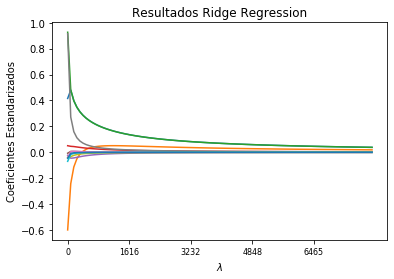

In [66]:
# Miremos cómo cambian los coeficientes con distintos lambdas
prex_con = prex_std.copy()

LL = 100
Llin = np.linspace(0,8000,LL)
Beta_ridge    = np.zeros((LL,11))
counter = 0
for lamb in Llin:
    # primero la matriz
    xlamb  = np.dot(prex_con.T,prex_con) + lamb*np.eye(11)
    # Ahora obtengamos la descomposición de cholesky:
    xty    = np.dot(prex_con.T,yy_std)
    beta_l   = np.linalg.lstsq(xlamb, xty)[0]
    Beta_ridge[counter,:] = beta_l.flatten()
    counter +=1

plt.plot(np.arange(LL),Beta_ridge)
plt.xticks(np.arange(100)[::20],np.round(Llin[::20],decimals=0).astype('int'), fontsize=8)
plt.xlabel('$\lambda$')
plt.ylabel('Coeficientes Estandarizados')
plt.title('Resultados Ridge Regression')


<ipython-input-67-fc85acf434e7>:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta_l   = np.linalg.lstsq(xlamb, xty)[0]


Text(0.5, 1.0, 'Resultados 10F CV')

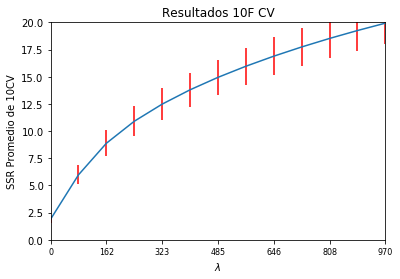

In [67]:
# cross-validation:
K =10
cv_grp = np.random.multinomial(1,[1.0/K]*K, N)
SSRCv  = np.zeros((LL,K))
for k in range(K):
    # asignación en grupos
    ind_train = cv_grp[:,k]==0
    nobs_train = ind_train.sum()
    ind_valid = cv_grp[:,k]==1
    # variables
    y_train   = yy_std[ind_train]
    y_valid   = yy_std[ind_valid]
    x_train   = prex_std[ind_train,:]
    x_valid   = prex_std[ind_valid,:]
    # listos para loop sobre los lambdas
    counter = 0
    for lamb in Llin:
        # primero la matriz
        xlamb  = np.dot(x_train.T,x_train) + lamb*np.eye(11)
        xty    = np.dot(x_train.T,y_train)
        # probemos con la función lstsq
        beta_l   = np.linalg.lstsq(xlamb, xty)[0]
        # ahora miremos el método usual
        beta_l   = np.dot(np.linalg.inv(xlamb), xty)
        # ssr en validación
        yhat_valid = np.dot(x_valid,beta_l.reshape((11,1)))
        y_diff     = y_valid - yhat_valid
        ssr        = np.dot(y_diff.T, y_diff)
        SSRCv[counter,k] = ssr[0,0]
        counter += 1
#pd.DataFrame(SSRCv.T).mean().loc[:10].plot()
meancv = pd.DataFrame(SSRCv.T).mean().values
semcv  = pd.DataFrame(SSRCv.T).sem().values
plt.plot(meancv)
plt.bar(np.arange(100),meancv, fc='w',ec='w', align='center', yerr=1.96*semcv, ecolor='r')
plt.xticks(np.arange(100)[::2],np.round(Llin[::2],decimals=0).astype('int'), fontsize=8)
plt.axis([0,12,0,20])
plt.xlabel('$\lambda$')
plt.ylabel('SSR Promedio de 10CV')
plt.title('Resultados 10F CV')

# Los resultados de 10F - CV sugieren que en este caso no es necesaria la regularización

# Más regularización: Lasso


* Lasso es otro método de regularización de los coeficientes, que utiliza una métrica distinta para penalizar coeficientes grandes.

$$
\beta_{lasso} = argmin_{\beta} (y - X\beta)'(y - X\beta) + \lambda \sum_j \left \vert \beta_j \right \vert
$$

* Desde un punto de vista de optimización, este es un problema de [programación cuadrática](https://en.wikipedia.org/wiki/Quadratic_programming), i.e. uno donde la función objetivo es cuadrática y está sujeto a restricciones lineales.

    * Una alternativa es utilizar una librería de optimización cuadrática como [`cvxopt`](http://cvxopt.org/).
    * Vamos a ver otros métodos para resolver el problema de optimización que son computacionalmente eficientes.


* Así que la mala noticia es que no hay una solución analítica, como si lo había en el caso del Ridge.


* La principal diferencia entre el Lasso y el Ridge es que el segundo reduce los coeficientes, y en el límite, cuando $\lambda \rightarrow \infty$, los coeficientes son cero.


* En Lasso, parte de la solución son algunos coeficientes exactamente iguales a cero, *para cualquier valor de $\lambda$*, así que es un método que permite hacer selección de variables.


# Comparación entre Lasso y Ridge

![caption](figures/lasso_ridge.png)

Figura 6.7 de [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

# ¿Cómo se encuentra la solución de Lasso?


* Vamos a utilizar un método de optimización que se llama [coordinate descent](https://www.cs.cmu.edu/~ggordon/10725-F12/slides/25-coord-desc.pdf).


* La idea es simple: queremos minimizar 
$$
f(\beta) = g(\beta) + \sum_i h_i(\beta_i)
$$


donde $g$ es una función convexa y diferenciable, y cada una de las $h_i$ es una función convexa, no necesariamente diferenciable.


* Para encontrar el mínimo podemos hacerlo *coordenada por coordenada*.


* En el caso de Lasso, el siguiente algoritmo funciona perfectamente (ver [acá, por ejemplo](http://web.stanford.edu/~hastie/TALKS/glmnet.pdf)).

In [69]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30,
                                         n_informative=10, noise=100,
                                         coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)

print(X_train.shape)
print(y_train.shape)

(60, 30)
(60,)


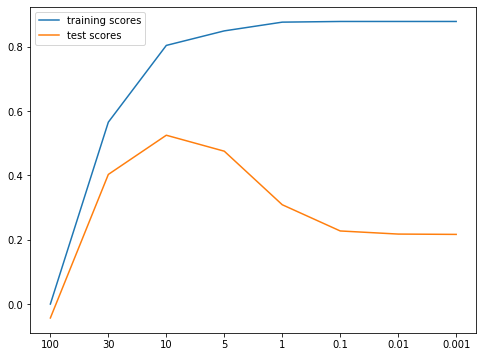

In [71]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

alphas = [100, 30, 10, 5, 1, 0.1, .01, 0.001]
for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
plt.figure(figsize=(8,6))
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(len(alphas)), alphas)
plt.legend(loc="best")

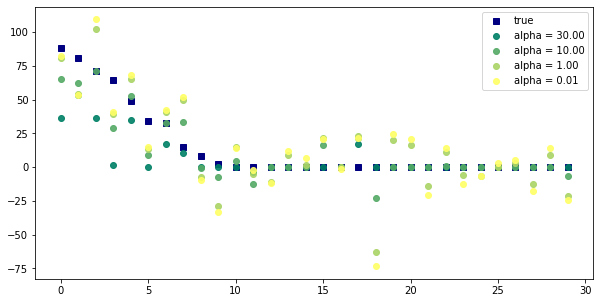

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "s", label="true", c='navy')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, alpha=0.9, c=plt.cm.summer(i / 3.))
    
plt.legend(loc="best")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.054e+01, tolerance: 4.958e+01
  model = cd_fast.enet_coordinate_descent(


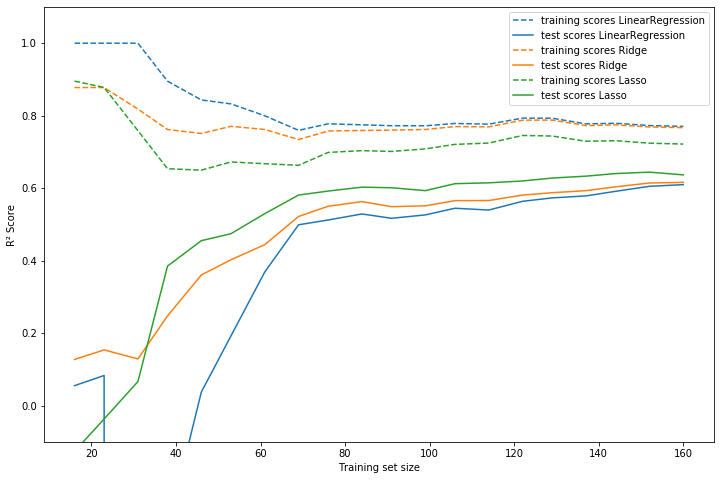

In [73]:
plt.figure(figsize=(12, 8))    
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)

Nota: En lugar de tener que elegir entre Ridge o Lasso, es posible utilizar la Regresión ElasticNet, que combina ambas formas de regularización a través de un parámetro de ponderación que nos permite elegir a qué tipo de regularización darle más peso. En muchos casos ElasticNet obtiene un rendimiento mayor que Ridge o Lasso.

# Pseudocódigo de Lasso vía Coordinate Descent


* Estandaricemos la matriz $X$ y $y$.


* Repita lo siguiente hasta que haya convergencia, para todo $k = 1, 2, \cdots, p, 1, 2, \cdots$:

> **Paso 1**: Obtenga los residuos excluyendo el regresor $k$: 
$$    
    r_{-k} = y - x_{-k}\beta_{-k}
$$
>     donde $x_{-k}$ excluye al regresor $k$, y $\beta_{-k}$ es la versión actual de los coeficientes excluyendo al $k-$ésimo.


> **Paso 2**: Obtenga el estimador de OLS simple para el regresor $k$:
    
$$    
    \beta^*_{k} = \frac{1}{N} r_{-k}'x_k = \frac{1}{N} \sum_j r_{-k,j}x_{jk}
$$


> **Paso 3**: Actualice $\beta_k$ por medio de *soft-thresholding*

$$
\begin{eqnarray*}
\beta_k &=& signo(\beta^*_{k})(\left \vert \beta^*_{k} \right \vert -\lambda)_{+} \\
\end{eqnarray*}
$$

>  donde $(x)_{+} = max(0,x)$ denota la [parte positiva](http://mathworld.wolfram.com/PositivePart.html)

# Veamos cómo se hace en Python

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


data_cr = pd.read_csv('Files/Credit.csv')
nobs    = data_cr.shape[0]
saldo    = np.asarray(data_cr.Balance).reshape((nobs,1))
male     = np.asarray(data_cr.Own==' Yes').reshape((nobs,1))
student  = np.asarray(data_cr.Student=='Yes').reshape((nobs,1))
married  = np.asarray(data_cr.Married=='Yes').reshape((nobs,1))
eth_dum  = np.asarray(pd.get_dummies(data_cr.Region))[:,:-1]
oth_xmat = data_cr[[u'Income', u'Limit', u'Rating', u'Cards', u'Age', u'Education']]

labs_x = np.array([u'Income', u'Limit', u'Rating', u'Cards', u'Age', u'Education',
              'Hombre','Estudiante','Casado','South','West'])

prexmat  = np.concatenate((oth_xmat, male, student, married, eth_dum),axis=1)
#print prexmat.shape
nvar = prexmat.shape[1]
# I will start by standardizing/normalizing the matrix
prexmat_std = prexmat.copy()
ind_dum = np.array([pd.Series(prexmat[:,k]).unique().shape[0] for k in range(nvar)])
prexmat_std[:,ind_dum>2] -= prexmat_std[:,ind_dum>2].mean(axis=0).reshape((1,6))
# get the norms
norm_pxmat = np.array([np.linalg.norm(prexmat_std[:,ind_dum>2][:,k]) for k in range(np.sum(ind_dum>2))])
# ready to normalize
prexmat_std[:,ind_dum>2] /= prexmat_std[:,ind_dum>2].std(axis=0).reshape((1,6))

# also standardize y
yy_std = saldo.copy()
yy_std = yy_std - yy_std.mean()
yy_std = yy_std / yy_std.std()

In [75]:
# Fijemos un lambda:
lambda_vec = 0.1
# Inicialicemos el vector:
beta_actual = np.zeros((1,11))
dist = 1
counter = 0
maxiter = 10000
# loop externo: si no hay convergencia continúe
while dist>0.001: 
    #or counter<maxiter:
    # Loop interno: ciclo con los regresores
    beta_old = beta_actual.copy()
    for k in range(11):
        # Residuos parciales excluyendo k
        inc_k    = np.setdiff1d(np.arange(11),np.array([k]))
        xmat_k   = prexmat_std[:,inc_k]
        beta_k   = beta_actual[0,inc_k]
        resids_k = yy_std - np.dot(xmat_k, beta_k.reshape((10,1)))
        # OLS simple de k:
        beta_star_k = np.dot(resids_k.T,prexmat_std[:,k].reshape((nobs,1)))/(1.0*nobs)
        # Actualicemos beta_k
        beta_actual[0,k] = np.sign(beta_star_k)*np.max([0,np.abs(beta_star_k)-lambda_vec])
    # Actualicemos distancia:
    dist = np.max(np.abs(beta_actual-beta_old))
    counter +=1
print("total iteraciones: ", counter)
pd.DataFrame(beta_actual.T, index= labs_x.flatten(), columns = ['Nuestro'])

total iteraciones:  244


,Nuestro
Income,-0.111265
Limit,0.287465
Rating,0.565110
Cards,0.000000
Age,-0.000000
Education,0.000000
Hombre,0.000000
Estudiante,0.000000
Casado,-0.000000
South,-0.000000


# Cómo se haría en Scikit-learn?

In [76]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(prexmat_std,yy_std)
pd.DataFrame(clf.coef_, index = labs_x, columns=['Scikit-Learn'])

,Scikit-Learn
Income,-0.109992
Limit,0.140338
Rating,0.710770
Cards,0.000000
Age,-0.000000
Education,0.000000
Hombre,0.000000
Estudiante,0.000000
Casado,-0.000000
South,-0.000000


In [77]:
# Miremos todo el path de lasso
L = 100
lambda_grid = np.linspace(0,0.6,L)
BetaLasso  = np.zeros((L,11))
for lamb in range(L):
    lambda_vec = lambda_grid[lamb]
    # Inicialicemos el vector:
    beta_actual = np.zeros((1,11))
    dist = 1
    counter = 0
    maxiter = 10000
    # loop externo: si no hay convergencia continúe
    while dist>0.001: 
        #or counter<maxiter:
        # Loop interno: ciclo con los regresores
        beta_old = beta_actual.copy()
        for k in range(11):
            # Residuos parciales excluyendo k
            inc_k    = np.setdiff1d(np.arange(11),np.array([k]))
            xmat_k   = prexmat_std[:,inc_k]
            beta_k   = beta_actual[0,inc_k]
            resids_k = yy_std - np.dot(xmat_k, beta_k.reshape((10,1)))
            # OLS simple de k:
            beta_star_k = np.dot(resids_k.T,prexmat_std[:,k].reshape((nobs,1)))/(1.0*nobs)
            # Actualicemos beta_k
            beta_actual[0,k] = np.sign(beta_star_k)*np.max([0,np.abs(beta_star_k)-lambda_vec])
        # Actualicemos distancia:
        dist = np.max(np.abs(beta_actual-beta_old))
        counter +=1
    # terminó, podemos actualizar
    BetaLasso[lamb,:] = beta_actual.reshape((1,11))

Text(0.5, 1.0, 'Path Completo de Lasso')

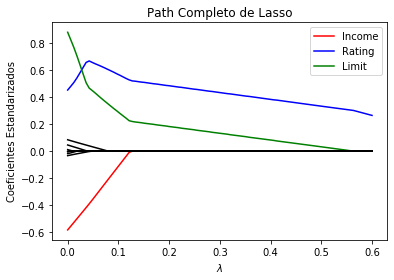

In [78]:
BetaLassoDF = pd.DataFrame(BetaLasso, columns= labs_x)
BetaLassoDF['lambda_lasso'] = lambda_grid
# Grafiquemos:
plt.plot(BetaLassoDF.lambda_lasso, BetaLassoDF.Income, label='Income', color='r')
plt.plot(BetaLassoDF.lambda_lasso, BetaLassoDF.Rating, label='Rating', color='b')
plt.plot(BetaLassoDF.lambda_lasso, BetaLassoDF.Limit,  label='Limit', color='g')
labs_exc = np.array([u'Cards', u'Age', u'Education',
              'Hombre','Estudiante','Casado','South','West'])
for k in range(8):
    plt.plot(BetaLassoDF.lambda_lasso, BetaLassoDF[labs_exc[k]], color='k')
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('Coeficientes Estandarizados')
plt.title('Path Completo de Lasso')